In [1]:
import little_mallet_wrapper as lmw
import pandas as pd 
import ast 
from lmw import *

MALLET_PATH = "~/mallet/bin/mallet"
POSITIVE_USER_PATH = "../data/positive_user.csv"
POSITIVE_NAR_PATH = "../data/narrative_positive.csv"

## Data Preprocessing

In [2]:
positive_users = pd.read_csv(POSITIVE_USER_PATH)
positive_users['selftext'] = positive_users['selftext'].apply(ast.literal_eval)
positive_users['created_utc'] = positive_users['created_utc'].apply(ast.literal_eval)
positive_users['link_flair_text'] = positive_users['link_flair_text'].apply(ast.literal_eval)
positive_users['title'] = positive_users['title'].apply(ast.literal_eval)
positive_users.head(5)

,author,subreddit_id,selftext,created_utc,link_flair_text,title
0,1222234,t5_2tmc8,[Ok my mom literally spoonfed me. I went home ...,[1633136580],[:karma:personal story:karma:],[My mom spoonfed me]
1,399allday,t5_33q99,[I’ve lost weight many times while coming off ...,[1674828171],[my story],[I know my mind is fucked up]
2,44morejumperspls,t5_rbmui,"[After doing well for a long time, I feel myse...",[1673692750],[story time],[I feel myself sinking into relapse]
3,According_Ad169,t5_2qpcj,[i've been better at eating more nutritious fo...,[1673999909],[recovery story],[just fully finished my first complete meal in...
4,Acrobatic-Move6552,t5_rbmui,[So here is my story/situation. \n\nSo in my p...,[1674761458],[story time],[Do I have an ed?]


In [3]:
multiple_df = positive_users[positive_users['selftext'].apply(lambda x: len(x) > 1)].reset_index(drop=True)
multiple_df

,author,subreddit_id,selftext,created_utc,link_flair_text,title
0,FrancineUrgot,t5_o3plh,"[tl;dr it's a rollercoaster, but I thought if ...","[1612305177, 1596903338]","[recovery story, recovery story]","[How my 4 months of recovery has been, Dealing..."
1,RhiRhi12120,t5_rbmui,"[Ever since this Idaho murder thing, I’ve been...","[1673426140, 1672910467]","[story time, story time]",[I had unprotected sex with my neighbour so I ...
2,Yumm_strawberry,t5_33q99,[I know a lot of you beat yourself up after ev...,"[1674748988, 1674687400, 1674003069]","[progress, progress, progress]","[To anyone who feels it isn't enough.., 12 day..."
3,[deleted],t5_o3plh,[I felt like I needed to tell someone who'd un...,"[1627000812, 1602715563]","[recovery story, recovery story]","[Recovery is Hard, Anorexia Nervosa Documentar..."
4,peepeduk,t5_rbmui,[I thought I developed an eating disorder a co...,"[1672786395, 1672704586]","[story time, story time]","[I’m pretty sure im a wannabe, I think my eati..."
5,upandawaywethrowin,t5_rbmui,[So I thought I might share it with you. Whoev...,"[1674772568, 1672390074]","[story time, story time]","[A sentence that changed my life: ""It really g..."
6,user89135,t5_2qpcj,[Smoothies really helped me. You can put a ban...,"[1675104970, 1674942576]","[recovery story, recovery story]","[ED tip if you are trying to eat more, Recover..."


In [4]:
positive_df = pd.read_csv(POSITIVE_NAR_PATH)

count    159.000000
mean      14.169811
std       16.429445
min        1.000000
25%        5.000000
50%        8.000000
75%       17.000000
max      118.000000
dtype: float64

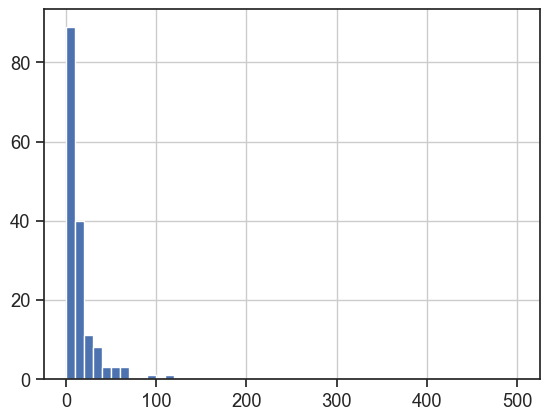

In [5]:
word_count = []
for posts in positive_users['selftext']:
    for post in posts: 
        word_count.append(len(post.split(".")))
word_count = pd.Series(word_count)
word_count.hist(bins=50, range=[0,500])
word_count.describe()

## Topic Modeling (temporal)
- Training data:
    + Selected narrative-positive posts from users who post at least twice. 
    + Each document represents a post. 

In [6]:
text = [sub for i in multiple_df['selftext'] for sub in i]
training_data = [lmw.process_string(t) for t in text]
training_data = [d for d in training_data if d.strip()]
training_data

['rollercoaster thought someone could use insight post maybe started recovery around NUM months ago relapsed NUM weeks came back late october made come back recovery best friends sat told didn think could sit watch die anymore becoming much day told started actual recovery extreme hunger weeks still sometimes didn run exercise beforehand month aunt offered gym also started craving bunch meats naturally ate bunch protein nowhere started gaining muscle see gained much muscle back yes also gained weight along weight gain came super fast sometimes would slow back fast slow still kind like honestly even weigh often anymore starting become irrelevant slowly extreme hunger varies still certain days week certain days almost normal hits certain time sometimes say people worried huge amounts weight gain fast gained super fast within week massive anxiety attack almost relapsed experience weight isn real weight body processing honestly really tough moments feel much better stronger thought going g

In [7]:
num_topics = 5
output_directory_path = "../data/output/temporal-output/"
lmw_training(num_topics, output_directory_path, training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 200
total tokens: 1213
<10> LL/token: -8.19394
<20> LL/token: -8.03695
<30> LL/token: -7.9987
<40> LL/token: -7.99984

0	1	film life nervosa www https indiegogo disease documentary together hope campaign money educate goal many haven gaining post title emb 
1	1	really much think always even didn thought felt body disorder wanted week first since ever constantly got matter might bad 
2	1	like time recovery never feel people everyone something NUM anorexia keep two living isn came helped needed proud lot put 
3	1	way better weight get would also told one said gets home experience last need cos many look else liked weighed 
4	1	know eating still started food binge say normal back days ago months progress today long going day went dont every 

<50> LL/token: -7.9146
<60> LL/token: -7.87539
<70> LL/token: -7.92344
<80> LL/token: -7.86261
<90> LL/token: -7.89139

0	1	film nervosa anorexia NUM www https indiegogo dise

Complete


[beta: 0.59776] 
<830> LL/token: -6.43289
[beta: 0.59941] 
<840> LL/token: -6.41318

0	0.00852	film nervosa anorexia www https indiegogo disease documentary together campaign educate goal NUM title emb feature qxumaqNUMofwo com/watch youtube com/projects/gaining 
1	0.04111	home get cos today dog bath door bathroom naked need sleep wanted like still didn message right food limit stayed 
2	0.0651	better really people like life felt keep one get many way weight needed gets know time please recover lgbtq aimed 
3	0.06468	eating feel started normal like weight still recovery think constantly know disorder going really week fast sometimes anymore didn back 
4	0.07022	something never everyone way matter body time binge life got always living even much dont proud give live short put 

[beta: 0.60625] 
<850> LL/token: -6.4045
[beta: 0.59153] 
<860> LL/token: -6.47389
[beta: 0.58913] 
<870> LL/token: -6.49934
[beta: 0.62113] 
<880> LL/token: -6.4989
[beta: 0.56144] 
<890> LL/token: -6.60231

0	0

In [8]:
topic_keys = lmw.load_topic_keys(output_directory_path + "mallet.topic_keys." + str(num_topics))
topic_label = []
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))
    topic_label.append(t[0])
topic_label

0 	 film nervosa anorexia www https indiegogo disease documentary together campaign
1 	 home cos dog bath door bathroom naked need get sleep
2 	 really way better people like life know get would one
3 	 weight recovery time days still much didn NUM started keep
4 	 eating never think even something disorder normal constantly always wanted


['film', 'home', 'really', 'weight', 'eating']

In [9]:
# For each topic, get the ranking of all the documents
ranking_doc = {}
topic_distributions = lmw.load_topic_distributions(output_directory_path + "mallet.topic_distributions." + str(num_topics))
for i in range(num_topics):
    ranking_doc[topic_label[i]] = []
    for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=i, n=15):
        if p > 0.1: 
            ranking_doc[topic_label[i]].append(str(training_data.index(d)))
ranking_doc

{'film': ['8', '12'],
 'home': ['2', '3'],
 'really': ['13', '11', '14', '7', '1'],
 'weight': ['5', '4', '6', '0', '7', '14', '9'],
 'eating': ['10', '9', '12', '1', '6', '0', '4']}

In [10]:
# Get the position of each document in the ranking
ranking_pos = {}
for topic in ranking_doc: 
    for doc in ranking_doc[topic]: 
        if doc not in ranking_pos:
            ranking_pos[doc] = [(topic, ranking_doc[topic].index(doc))]
        else: 
            ranking_pos[doc].append((topic, ranking_doc[topic].index(doc)))

ranking_pos = {k: sorted(v, key=lambda x: x[1]) for k, v in ranking_pos.items()}
ranking_pos = dict(sorted(ranking_pos.items(), key=lambda item: int(item[0])))

In [11]:
# (0,1), (2,3), (4,5,6), (7,8), (9,10), (11,12), (13,14) belong to the same user
# (7,8) is about filiming documentary
for item in ranking_pos: 
    print(item, ranking_pos[item][0])

0 ('weight', 3)
1 ('eating', 3)
2 ('home', 0)
3 ('home', 1)
4 ('weight', 1)
5 ('weight', 0)
6 ('weight', 2)
7 ('really', 3)
8 ('film', 0)
9 ('eating', 1)
10 ('eating', 0)
11 ('really', 1)
12 ('film', 1)
13 ('really', 0)
14 ('really', 2)


Not really interesting result because most users post about the same topic over time. Can be because the number of topics is small. However, k>5 returns topics of lower quality. 

## Topic Modeling (General)
- Training data:
    + Selected narrative-positive posts. 
    + Each document represent a post. 

In [12]:
training_data = [lmw.process_string(t) for t in positive_df['selftext'].tolist()]
training_data = [d for d in training_data if d.strip()]
training_data

['smoothies really helped put banana two whole mango orange juice blend like drink lots food might work everyone really helped recovery',
 'started getting insecure lockdown bullied weight started eating really unhealthy amounts food continued felt weak tired time tried recover relapsed started recover start december going really well especially last week went full meal day breakfast lunch dinner snacks much energy headaches gone know long way get really proud far come know hard sometimes please keep pushing much healthier happier please know message ever need help people care listen',
 'NUM years seems like life long NUM years old illness came look back feel sad child tormented disease didn know cope recognize triggers still hard live',
 'six days binge free today didn rexist started binging disappointed really good last week really proud',
 'NUM years recovery promise gets better living life right couldn imagined NUM years ago boyfriend straight lots friends vibrant social life great

In [13]:
num_topics = 15
output_directory_path = "../data/output/general-output/"
lmw_training(num_topics, output_directory_path, training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 731
total tokens: 16073
<10> LL/token: -8.71708
<20> LL/token: -8.55532
<30> LL/token: -8.51052
<40> LL/token: -8.47296

0	0.33333	really eat wanted still didn looked feel went came well happy understand ended share say helped saw might anyway used 
1	0.33333	like day one hard meal fuck sad give next gonna best whole food avoid longer exercise cause side dont ass 
2	0.33333	eat much even body food good never think would thought always everyone binge end kind disorder bed make thinking course 
3	0.33333	day bad finally help every doesn today started recovery took week brain different often enough feeling won want ago free 
4	0.33333	feel weight since time like binge felt body first night months thing would haven done looking purge scared bulimia anyone 
5	0.33333	normal think year school home long time person fast made even ate old weeks one could good said remember least 
6	0.33333	food like felt wasn really 

Complete


In [14]:
topic_keys = lmw.load_topic_keys(output_directory_path + "mallet.topic_keys." + str(num_topics))
topic_label = []
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))
    topic_label.append(t[0])
topic_label

0 	 health hospital brain xNUMb one sign forever eds suddenly wait
1 	 patient milk made room one sticker chart rolls paper side
2 	 eat eating food binge NUM full make feel even meals
3 	 pill real put broke else threw world hormones morning fear
4 	 school bulimia purging times difficult purge age wish parents could
5 	 normal bmi muscle use constantly call meant underweight naturally bigger
6 	 cream ice maintenance snack cheese else urge avoid weird pharmacy
7 	 film nervosa https together treatment disease www indiegogo documentary anorexia
8 	 home two face mom bathroom coming cheese purge toilet friends
9 	 asked school year came others dad sitting whole wonder adult
10 	 fuck deserve media culture diet tenacious help light exist humor
11 	 like time know feel really NUM get even day would
12 	 NUM weight years year months relationship month lost though since
13 	 self means harm ana diet form brain drugs tylenol physical
14 	 things hope found gets comfort life shit body times 

['health',
 'patient',
 'eat',
 'pill',
 'school',
 'normal',
 'cream',
 'film',
 'home',
 'asked',
 'fuck',
 'like',
 'NUM',
 'self',
 'things']

In [15]:
# For each topic, get the ranking of all the documents
ranking_doc = {}
topic_distributions = lmw.load_topic_distributions(output_directory_path + "mallet.topic_distributions." + str(num_topics))
for i in range(num_topics):
    ranking_doc[topic_label[i]] = []
    for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=i, n=15):
        if p > 0.1: 
            ranking_doc[topic_label[i]].append(str(training_data.index(d)))
ranking_doc

{'health': ['120', '57', '45', '101', '132', '123'],
 'patient': ['28', '78', '61', '40', '105', '12', '147', '148', '139'],
 'eat': ['71',
  '60',
  '74',
  '151',
  '42',
  '81',
  '139',
  '121',
  '136',
  '7',
  '146',
  '140',
  '5',
  '21',
  '97'],
 'pill': ['62',
  '122',
  '107',
  '8',
  '76',
  '10',
  '33',
  '150',
  '80',
  '130',
  '138',
  '42',
  '111',
  '93',
  '64'],
 'school': ['52',
  '134',
  '102',
  '123',
  '25',
  '35',
  '132',
  '89',
  '137',
  '69',
  '77',
  '118',
  '20',
  '141',
  '19'],
 'normal': ['11',
  '16',
  '110',
  '87',
  '84',
  '37',
  '75',
  '20',
  '58',
  '71',
  '79',
  '91',
  '116',
  '36',
  '104'],
 'cream': ['79',
  '24',
  '117',
  '89',
  '15',
  '73',
  '53',
  '38',
  '133',
  '92',
  '34',
  '51',
  '10',
  '136',
  '12'],
 'film': ['108', '65', '129', '55', '29', '93', '36', '38', '44'],
 'home': ['67',
  '17',
  '47',
  '59',
  '27',
  '90',
  '126',
  '131',
  '43',
  '52',
  '127',
  '30',
  '125',
  '13',
  '41'],
 'as

In [16]:
# Get the position of each document in the ranking
ranking_pos = {}
for topic in ranking_doc: 
    for doc in ranking_doc[topic]: 
        if doc not in ranking_pos:
            ranking_pos[doc] = [(topic, ranking_doc[topic].index(doc))]
        else: 
            ranking_pos[doc].append((topic, ranking_doc[topic].index(doc)))

ranking_pos = {k: sorted(v, key=lambda x: x[1]) for k, v in ranking_pos.items()}
ranking_pos = dict(sorted(ranking_pos.items(), key=lambda item: int(item[0])))

In [17]:
# Top topic for each document
for item in ranking_pos: 
    print(item, ranking_pos[item][0])
    

1 ('like', 9)
3 ('like', 1)
4 ('like', 0)
5 ('eat', 12)
6 ('self', 6)
7 ('eat', 9)
8 ('pill', 3)
10 ('pill', 5)
11 ('normal', 0)
12 ('patient', 5)
13 ('things', 4)
14 ('self', 5)
15 ('cream', 4)
16 ('normal', 1)
17 ('home', 1)
18 ('self', 8)
19 ('school', 14)
20 ('normal', 7)
21 ('asked', 12)
22 ('asked', 9)
23 ('NUM', 11)
24 ('cream', 1)
25 ('school', 4)
26 ('NUM', 1)
27 ('home', 4)
28 ('patient', 0)
29 ('film', 4)
30 ('home', 11)
31 ('fuck', 1)
32 ('fuck', 4)
33 ('pill', 6)
34 ('cream', 10)
35 ('school', 5)
36 ('film', 6)
37 ('normal', 5)
38 ('cream', 7)
39 ('asked', 1)
40 ('patient', 3)
41 ('self', 9)
42 ('eat', 4)
43 ('home', 8)
44 ('film', 8)
45 ('health', 2)
46 ('asked', 14)
47 ('home', 2)
48 ('asked', 2)
49 ('asked', 6)
50 ('asked', 3)
51 ('NUM', 10)
52 ('school', 0)
53 ('cream', 6)
54 ('self', 0)
55 ('film', 3)
56 ('NUM', 0)
57 ('health', 1)
58 ('normal', 8)
59 ('home', 3)
60 ('eat', 1)
61 ('patient', 2)
62 ('pill', 0)
63 ('like', 11)
64 ('asked', 0)
65 ('film', 1)
66 ('NUM', 8